In [1]:
%matplotlib inline

from scipy import ndimage as nd
import os
import sys
import scipy as sc
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [2]:
folders_train = os.walk("./notMNIST_large").next()[1]
folders_test = os.walk("./notMNIST_small").next()[1]

In [3]:
def load_image(imageFolderName):
    
    allImageArray = dict()
    
    maxAllowedNoOfImagesPerClass = 1000
        
    if(os.path.exists("all_image_array_"+ imageFolderName.split("./")[1] +".pickle")):
        allImageArray = pk.load(open("all_image_array_"+ imageFolderName.split("./")[1] +".pickle", "rb"))
        print "Images loaded for class - label:" + str(list(allImageArray.viewkeys()))
        return allImageArray
                  
    folders = os.walk(imageFolderName).next()[1]
    
    for folder in folders:
        imageArray = []
        currentLetter = folder
        folder = os.path.join(imageFolderName, folder)
        print "Getting images from folder " + folder
        images = os.walk(folder).next()[2]
        sys.stdout.write("Starting to Read image from:" + folder + "\n")
        currentNoOfImagesPerClass = 0
        
        for image in images:
            image = os.path.join(folder, image)
            try:
                currentImageArray = sc.misc.imread(image)
                imageArray.append(currentImageArray)
            except (IOError):
                print "Ignoring image: " + image
            currentNoOfImagesPerClass = currentNoOfImagesPerClass + 1
            if(currentNoOfImagesPerClass > maxAllowedNoOfImagesPerClass ):
                break
        allImageArray.update({currentLetter:imageArray})
        print "All Images read from folder" + folder + ", total image types till now:" + str(list(allImageArray.viewkeys()))
                  
    pk.dump(allImageArray, open("all_image_array_"+ imageFolderName.split("./")[1] +".pickle", "wb"), pk.HIGHEST_PROTOCOL)
    return allImageArray

In [4]:
allImageArrayTrain = load_image("./notMNIST_large")

Images loaded for class - label:['A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'J']


In [5]:
allImageArrayTest = load_image("./notMNIST_small")

Images loaded for class - label:['A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'J']


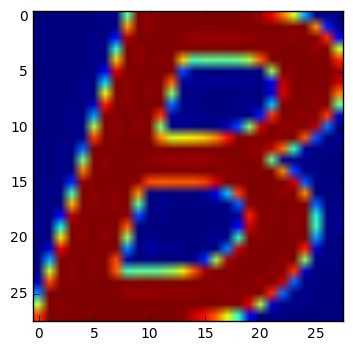

In [6]:
plt.imshow(allImageArrayTrain['B'][100])

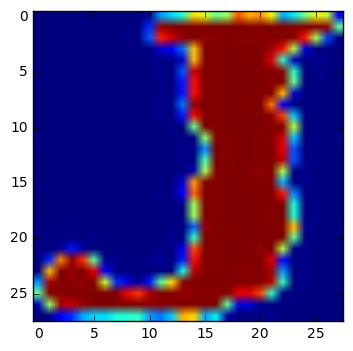

In [7]:
plt.imshow(allImageArrayTrain['J'][200])

A
(1001, 28, 28)
C
(1001, 28, 28)
B
(1001, 28, 28)
E
(1001, 28, 28)
D
(1001, 28, 28)
G
(1001, 28, 28)
F
(1001, 28, 28)
I
(1001, 28, 28)
H
(1001, 28, 28)
J
(1001, 28, 28)


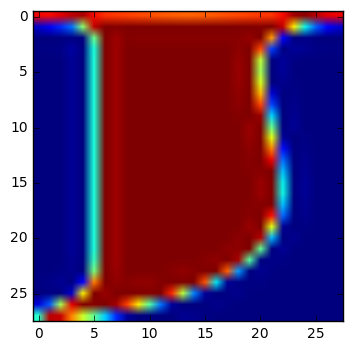

In [8]:
for k,v in allImageArrayTrain.viewitems():
    print k
    print np.array(v).shape  

plt.imshow(v[1000])

In [9]:
key_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,"I":9,'J':10} 

In [10]:
def create_array(allImageArray):
    X_y = np.empty(shape = [0,785])
    #y_train = np.empty(shape = [0,1])

    for k,v in allImageArray.viewitems():
        image_array = np.array(v)
        image_array = image_array.reshape([image_array.shape[0], image_array.shape[1] * image_array.shape[2]])
        k_array = np.zeros(shape = [image_array.shape[0], 1])
        k_array.fill(int(key_map[k]))
        X_y = np.concatenate((X_y, np.hstack((k_array, image_array))))
    
    print X_y.shape
    return X_y
    #print y_train.shape

X_y = create_array(allImageArrayTrain)
X_y_test = create_array(allImageArrayTest)

pk.dump(X_y, open("all_image_array_train.pickle", "wb"), pk.HIGHEST_PROTOCOL)
pk.dump(X_y_test, open("all_image_array_test.pickle", "wb"), pk.HIGHEST_PROTOCOL)


(10010, 785)
(10009, 785)


In [11]:
X_y[1:100:,0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [12]:
np.random.shuffle(X_y)

In [13]:
X_y[1:10,1:785]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  1.,  0.]])

In [14]:
#lr = LinearRegression()
lr = LogisticRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_y[:,1:785], X_y[:,0], test_size=0.4, random_state=0)

In [16]:
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scores = cross_val_score(lr, X_train, y_train, cv=cv)

In [17]:
scores

array([ 0.62042175,  0.67036626,  0.65038846])

In [18]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.04)
